# Detailed analysis for single n

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
experiment_id = "detail_n_50_conn_4"  # full_run
filename_results = f"results_experiment_{experiment_id}.json"

df_results = pd.read_json(f"../data/{filename_results}")
print(df_results.shape)
print(df_results["n"].unique())
df_results.head()

(200, 9)
[50]


,experiment_id,tindar_id,n,connectedness,p,solver,status,objective_value,time
0,detail_n_50_conn_4,0,50,4,0.34625,heuristic,Solved (optimal unsure),44,0.004605
1,detail_n_50_conn_4,1,50,4,0.34625,heuristic,Solved (optimal unsure),44,0.002683
2,detail_n_50_conn_4,2,50,4,0.34625,heuristic,Solved (optimal unsure),46,0.002667
3,detail_n_50_conn_4,3,50,4,0.34625,heuristic,Solved (optimal unsure),44,0.001401
4,detail_n_50_conn_4,4,50,4,0.34625,heuristic,Solved (optimal unsure),42,0.001674


In [3]:
# df_results = df_results[df_results["n"] == 500]

In [4]:
def solver_difference(df_sub):
    opt = df_sub.loc[df_sub["solver"] == "pulp"]
    heur = df_sub.loc[df_sub["solver"] == "heuristic"]
    
    opt_obj = opt["objective_value"].values[0]
    heur_obj = heur["objective_value"].values[0]

    opt_solvetime = opt["time"].values[0]
    heur_solvetime = heur["time"].values[0]
    
    if opt_obj == 0:
        perc_difference = 0
    else:
        perc_difference = (opt_obj - heur_obj)/opt_obj
    
    return pd.Series({
        "objective_difference_abs": opt_obj - heur_obj,
        "objective_difference_perc": perc_difference,
        "solvetime_difference_abs": opt_solvetime - heur_solvetime,
        "solvetime_difference_perc": (opt_solvetime - heur_solvetime)/heur_solvetime,
        "n": df_sub["n"].values[0],
        "connectedness": df_sub["connectedness"].values[0],
    })

df_solver_difference = df_results.groupby(["tindar_id"]).apply(solver_difference)
df_solver_difference.head()

,objective_difference_abs,objective_difference_perc,solvetime_difference_abs,solvetime_difference_perc,n,connectedness
tindar_id,,,,,,
0,6.0,0.120000,0.371709,80.713352,50.0,4.0
1,4.0,0.083333,0.422105,157.319928,50.0,4.0
2,4.0,0.080000,0.417945,156.715587,50.0,4.0
3,6.0,0.120000,0.414460,295.895267,50.0,4.0
4,8.0,0.160000,0.422849,252.613119,50.0,4.0


In [5]:
var_x = "objective_difference_abs"
x = df_solver_difference[var_x]

print(x.value_counts())
print(x.describe())

6.0    40
4.0    31
8.0    22
2.0     6
0.0     1
Name: objective_difference_abs, dtype: int64
count    100.000000
mean       5.520000
std        1.800561
min        0.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: objective_difference_abs, dtype: float64


0.120000    38
0.080000    26
0.160000    21
0.083333     5
0.040000     5
0.125000     2
0.166667     1
0.041667     1
0.000000     1
Name: objective_difference_perc, dtype: int64
count    100.000000
mean       0.110750
std        0.035976
min        0.000000
25%        0.080000
50%        0.120000
75%        0.120000
max        0.166667
Name: objective_difference_perc, dtype: float64


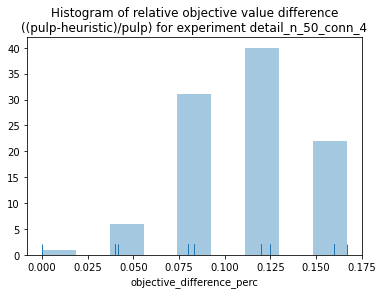

In [6]:
var_x = "objective_difference_perc"
x = df_solver_difference[var_x]

print(x.value_counts())
print(x.describe())

plt.figure()
plt.title(f"Histogram of relative objective value difference\n((pulp-heuristic)/pulp) for experiment {experiment_id}")
sns.distplot(x, bins=9, kde=False, rug=True)
plt.savefig(f"../documentation/figures/histogram_{var_x}_{experiment_id}")

count    100.000000
mean       0.495873
std        0.115310
min        0.358459
25%        0.402287
50%        0.452198
75%        0.589894
max        0.955207
Name: solvetime_difference_abs, dtype: float64


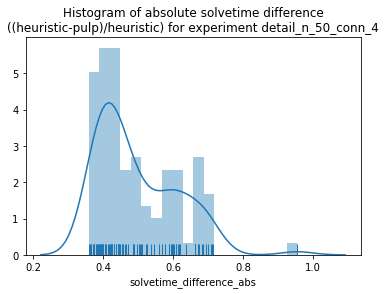

In [7]:
var_x = "solvetime_difference_abs"
x = df_solver_difference[var_x]

print(x.describe())

plt.figure()
plt.title(f"Histogram of absolute solvetime difference\n((heuristic-pulp)/heuristic) for experiment {experiment_id}")
sns.distplot(x, bins=20, rug=True)
plt.savefig(f"../documentation/figures/histogram_{var_x}_{experiment_id}")

count    100.000000
mean     242.504436
std       98.851100
min       78.464467
25%      172.596043
50%      235.924268
75%      294.609935
max      491.650722
Name: solvetime_difference_perc, dtype: float64


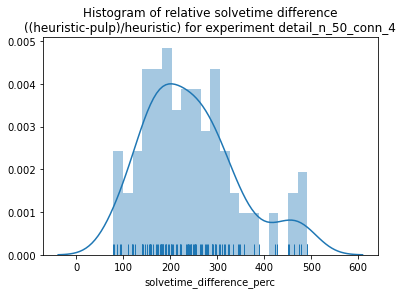

In [8]:
var_x = "solvetime_difference_perc"
x = df_solver_difference[var_x]

print(x.describe())

plt.figure()
plt.title(f"Histogram of relative solvetime difference\n((heuristic-pulp)/heuristic) for experiment {experiment_id}")
sns.distplot(x, bins=20, rug=True)
plt.savefig(f"../documentation/figures/histogram_{var_x}_{experiment_id}")